In [6]:
# Load the dataset
import pandas as pd
import numpy as np
file_path = "Energy_consumption_dataset.csv"  # Update with actual file path
data = pd.read_csv(file_path)

In [7]:
print(data.head())

   Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0      1     0  Saturday      No    25.139433  43.431581    1565.693999   
1      1     1  Saturday      No    27.731651  54.225919    1411.064918   
2      1     2  Saturday      No    28.704277  58.907658    1755.715009   
3      1     3  Saturday      No    20.080469  50.371637    1452.316318   
4      1     4  Saturday      No    23.097359  51.401421    1094.130359   

   Occupancy HVACUsage LightingUsage  RenewableEnergy  EnergyConsumption  
0          5        On           Off         2.774699          75.364373  
1          1        On            On        21.831384          83.401855  
2          2       Off           Off         6.764672          78.270888  
3          1       Off            On         8.623447          56.519850  
4          9        On           Off         3.071969          70.811732  


In [8]:
print(data.isnull().sum())

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64


In [9]:
# Feature Engineering 
## 1. Energy Efficiency Features
data["EnergyPerSqFt"] = data["EnergyConsumption"] / data["SquareFootage"]
data["OccupancyPerSqFt"] = data["Occupancy"] / data["SquareFootage"]

In [10]:
## 2. Interaction Features
data["Temp_Humidity_Interaction"] = data["Temperature"] * data["Humidity"]

In [12]:
## 3. Polynomial Features (2nd degree)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[["Temperature", "Humidity"]])
poly_columns = [f"Poly_{i}" for i in range(poly_features.shape[1])]
poly_df = pd.DataFrame(poly_features, columns=poly_columns)


In [14]:
# Encode categorical variables
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["DayOfWeek", "Holiday", "HVACUsage", "LightingUsage"]
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

In [15]:
# Select numerical features
numerical_features = ["Temperature", "Humidity", "SquareFootage", "Occupancy", "RenewableEnergy", 
                       "EnergyPerSqFt", "OccupancyPerSqFt", "Temp_Humidity_Interaction"]


In [16]:
# Combine numerical, encoded categorical, and polynomial features
X = pd.concat([data[numerical_features], encoded_df, poly_df], axis=1)
y = data["EnergyConsumption"]

In [18]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
print(X_train.head())


      Temperature   Humidity  SquareFootage  Occupancy  RenewableEnergy  \
4227    25.478605  52.641827    1089.607222          5         7.929568   
4676    22.573899  55.364801    1445.777387          4        14.214759   
800     25.566609  35.101091    1535.812088          8         3.849354   
3671    20.207940  50.938666    1384.005023          4        11.499814   
4193    20.034558  54.983408    1933.498736          6        16.708976   

      EnergyPerSqFt  OccupancyPerSqFt  Temp_Humidity_Interaction  \
4227       0.084014          0.004589                1341.240336   
4676       0.045156          0.002767                1249.799442   
800        0.053985          0.005209                 897.415894   
3671       0.057044          0.002890                1029.365523   
4193       0.037495          0.003103                1101.568269   

      DayOfWeek_Monday  DayOfWeek_Saturday  ...  DayOfWeek_Tuesday  \
4227               1.0                 0.0  ...                0.0   


In [20]:
print(X_test.head())


      Temperature   Humidity  SquareFootage  Occupancy  RenewableEnergy  \
1501    23.115059  30.015975    1424.678701          7        10.320502   
2586    28.416241  44.225105    1805.746167          2        18.375708   
2653    24.545405  48.097899    1506.721568          5        23.018962   
1055    28.849262  30.015975    1867.354237          7        13.906273   
705     21.637690  56.532159    1235.612294          4         3.081125   

      EnergyPerSqFt  OccupancyPerSqFt  Temp_Humidity_Interaction  \
1501       0.059507          0.004913                 693.821029   
2586       0.034766          0.001108                1256.711258   
2653       0.056567          0.003318                1180.582396   
1055       0.050620          0.003749                 865.938731   
705        0.060952          0.003237                1223.225352   

      DayOfWeek_Monday  DayOfWeek_Saturday  ...  DayOfWeek_Tuesday  \
1501               0.0                 0.0  ...                0.0   


In [21]:
print(y_train.head())

4227    91.542420
4676    65.286008
800     82.910470
3671    78.948576
4193    72.495637
Name: EnergyConsumption, dtype: float64


In [22]:
print(y_test.head())

1501    84.778571
2586    62.777773
2653    85.231391
1055    94.525334
705     75.312838
Name: EnergyConsumption, dtype: float64


In [24]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=50, random_state=42),
    "Support Vector Regression (SVR)": SVR(kernel="rbf"),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
}


In [28]:
# Training and Evaluating models
results = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": mean_squared_error(y_test, y_pred, squared=False)
    }

# Finding the best model
for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


Linear Regression:
  R2 Score: 0.8799
  MAE: 2.4528
  MSE: 10.0255
  RMSE: 3.1663

Ridge Regression:
  R2 Score: 0.4024
  MAE: 5.5727
  MSE: 49.8812
  RMSE: 7.0627

Lasso Regression:
  R2 Score: 0.2709
  MAE: 6.1620
  MSE: 60.8562
  RMSE: 7.8010

Decision Tree:
  R2 Score: 0.9729
  MAE: 1.0733
  MSE: 2.2584
  RMSE: 1.5028

Random Forest:
  R2 Score: 0.9907
  MAE: 0.5086
  MSE: 0.7792
  RMSE: 0.8827

Gradient Boosting:
  R2 Score: 0.9749
  MAE: 1.0717
  MSE: 2.0921
  RMSE: 1.4464

AdaBoost Regressor:
  R2 Score: 0.8138
  MAE: 3.1796
  MSE: 15.5431
  RMSE: 3.9425

Support Vector Regression (SVR):
  R2 Score: 0.2455
  MAE: 6.2662
  MSE: 62.9704
  RMSE: 7.9354

K-Nearest Neighbors:
  R2 Score: 0.0927
  MAE: 6.8788
  MSE: 75.7290
  RMSE: 8.7022



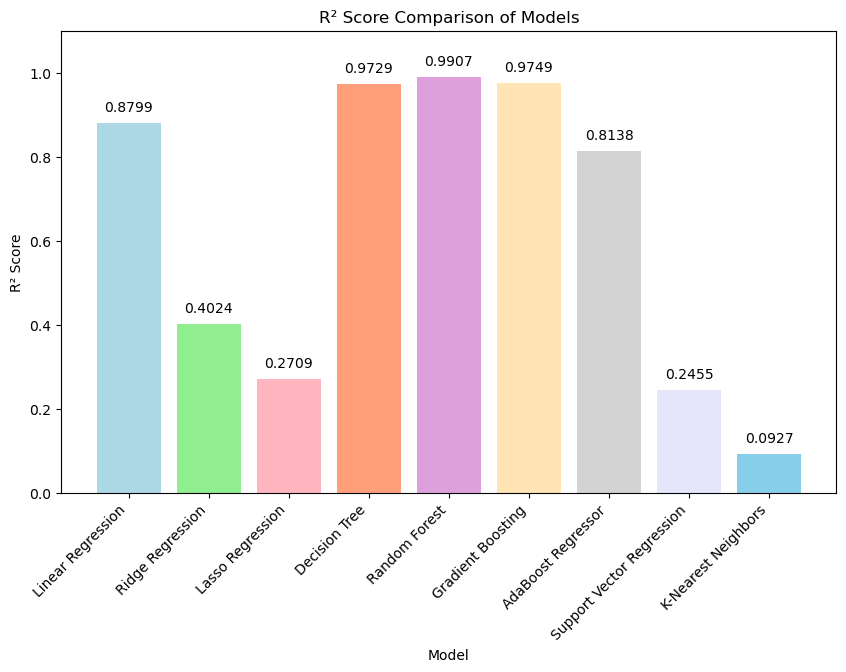

In [32]:
import matplotlib.pyplot as plt

# Data for models and their R² scores
models = [
    'Linear Regression', 'Ridge Regression', 'Lasso Regression', 
    'Decision Tree', 'Random Forest', 'Gradient Boosting', 
    'AdaBoost Regressor', 'Support Vector Regression', 'K-Nearest Neighbors'
]
r2_scores = [0.8799, 0.4024, 0.2709, 0.9729, 0.9907, 0.9749, 0.8138, 0.2455, 0.0927]

# Creating a bar chart
plt.figure(figsize=(10, 6))
colors = ["lightblue", "lightgreen", "lightpink", "lightsalmon", 
          "plum", "moccasin", "lightgray", "lavender", "skyblue"]

plt.bar(models, r2_scores, color=colors)

plt.title('R² Score Comparison of Models')
plt.xlabel('Model')
plt.ylabel('R² Score')

# Displaying the R² scores on top of the bars
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.02, f'{score:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1) 

plt.show()


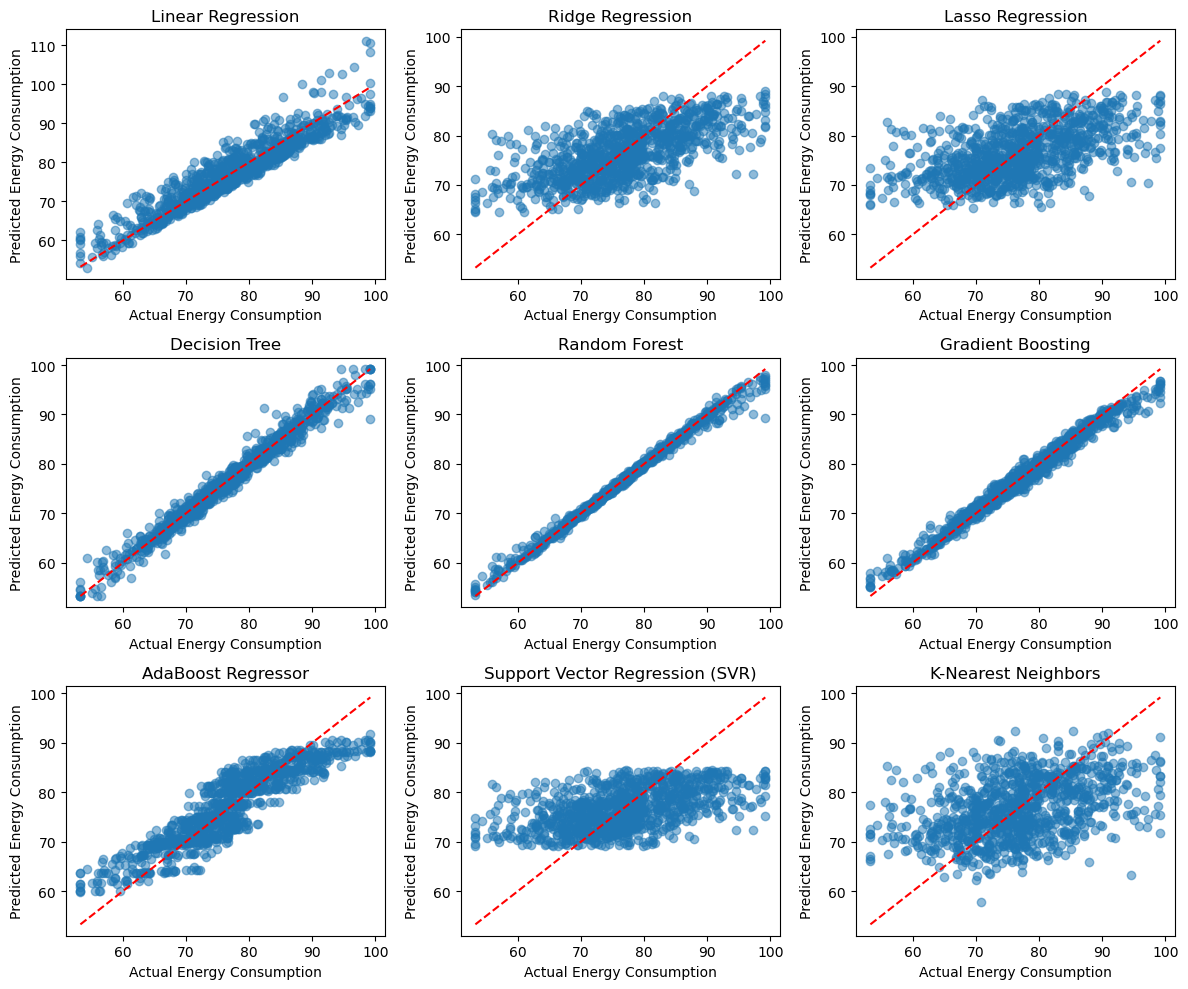

In [33]:
# Scatter plots for actual vs predicted values
plt.figure(figsize=(12, 10))
num_models = len(predictions)
cols = 3  # Set fixed columns
rows = (num_models // cols) + (num_models % cols > 0)  # Dynamically calculate rows

for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(rows, cols, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Energy Consumption")
    plt.ylabel("Predicted Energy Consumption")
    plt.title(f"{name}")

plt.tight_layout()
plt.show()



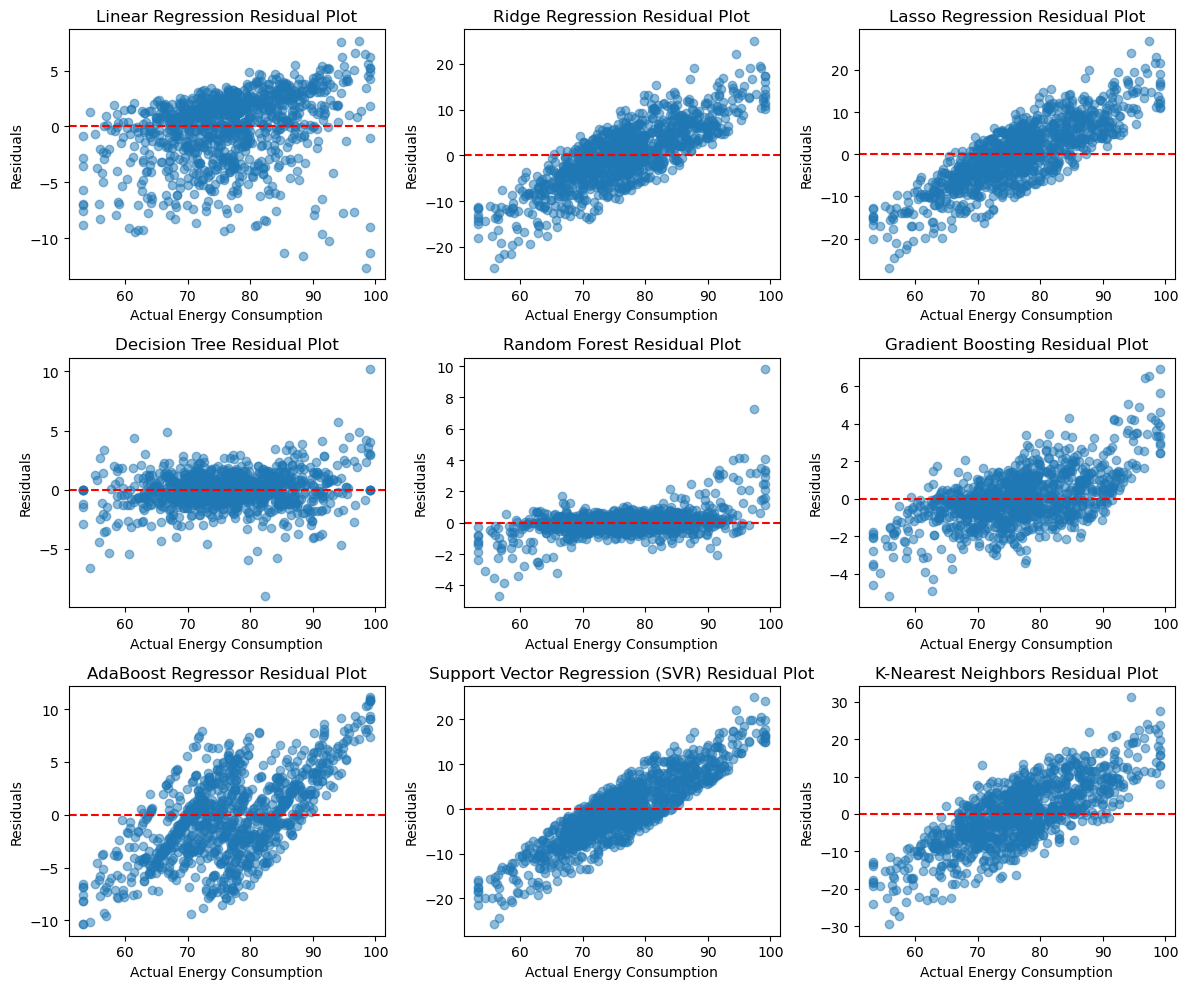

In [34]:
# Residual plots
plt.figure(figsize=(12, 10))
num_models = len(predictions)
cols = 3  
rows = (num_models // cols) + (num_models % cols > 0) 

for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(rows, cols, i)
    residuals = y_test - y_pred
    plt.scatter(y_test, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Actual Energy Consumption")
    plt.ylabel("Residuals")
    plt.title(f"{name} Residual Plot")

plt.tight_layout()
plt.show()